###**Problem Definition**

A company is selling products to customers. They do a lot of activities such as visiting customers, sending emails, hosting events and so on and so on to close deals. They want to utilize their data to


- **Activity Contribution:** Evaluate the activities they have done to close deals with customers.
- **Prediction:** Predict the probability of closing deals with each customer

###**Dataset**

They have two types of dataset, activity data and target data.


**Activity data**: Activity data is a record of activities they have done to each customer.


|column name|description|
|----|----|
|data|date when the activity has been done|
|customer|customer id to whom activity has been made|
|activity_type|type of the activity. There are 25 types, {a-y} at the moment.|
|activity_count|number of times the activity has been made on that date.|

**Target data**: Target data is a record of closed deals. Each record represents the date a deal has been closed with a customer.

|column name|description|
|----|----|
|customer|customer id with whom the deal has been closed|
|date|date when a deal has been closed with the customer|


#####**Importing essential libraries**

In [1]:
import pandas as pd                                         # Importing Pandas-A fundamental package for linear algebra and multidimensional arrays
from IPython.core.interactiveshell import InteractiveShell  # the below code is for displaying the output from all lines of python code within a single cell
InteractiveShell.ast_node_interactivity = "all"


#####**Importing and reading the activity data file**

In [2]:
from google.colab import files  # Uploading activity datafile into colab
uploaded = files.upload()

Saving activity.csv to activity (8).csv


In [3]:
activitydata=pd.read_csv('activity.csv') # Reading the activity datafile
activitydata.head()                      # Showing the first 5 row of the activity datafile
activitydata.shape                       # Checking total number of rows and columns

,date,customer,activity_type,activity_count
0,2021-01-20,0032j000002jRYxAAM,a,1
1,2021-05-11,0032j00000FZcIvAAL,a,1
2,2020-12-09,0032j000002gKM8AAM,a,1
3,2021-03-30,0032j000001UX7cAAG,a,1
4,2020-10-19,0032j000004etUWAAY,a,1


(904772, 4)

#####**Data Types and Missing Values of Activity datafile**

In [54]:
activitydata.isnull().sum() # Checking missing values

date              0
customer          0
activity_type     0
activity_count    0
dtype: int64

######There are no null values in the activity dataset
######We can see that there are 904772 rows and 4 columns. So the company has done 904772 activities

In [55]:
activitydata.info() # Checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904772 entries, 0 to 904771
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            904772 non-null  object
 1   customer        904772 non-null  object
 2   activity_type   904772 non-null  object
 3   activity_count  904772 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 27.6+ MB


###### activities are qualitative data

#####**Activity Count**

In [56]:
activitydata.nunique() # Checking the unique values of the variables

date                 265
customer          139556
activity_type         25
activity_count         1
dtype: int64

There are 25 unique activities and total 904772 activities were done to 139556 unique customers

m    141826
l    105307
x     87210
u     72070
j     67173
n     66369
a     54025
h     51355
i     38058
p     32318
b     30453
f     28804
y     26521
t     22475
v     20111
o     19318
w     18691
s     10313
c      6115
d      2728
k      1891
r      1032
q       490
e        71
g        48
Name: activity_type, dtype: int64

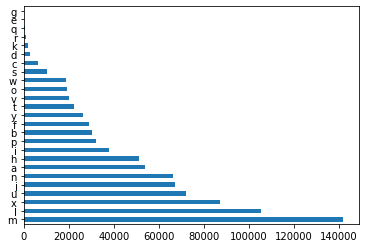

In [57]:
activitydata["activity_type"].value_counts()                     # Counting the frequency of each activity
activitydata["activity_type"].value_counts().plot(kind='barh')   # Plotting the frequency of each activity

Activity "m" was done 141826 times. This number is greater than the total number of unique customer. each activity may be done multiple times to a customer. Activity "m" was done the most and activity "g" was done the least.

#####**Importing and reading the target data file**

In [4]:
from google.colab import files       # Uploading target datafile into colab
uploaded = files.upload()

Saving target.csv to target (8).csv


In [5]:
targetdata=pd.read_csv('target.csv')  # Reading the target datafile
targetdata.head()                     # Showing the first 5 row of the target datafile
targetdata.shape                      # Checking total number of rows and columns

,customer,date
0,0032j000001UaIdAAK,2020-11-06
1,0032j000002hwpFAAQ,2021-05-20
2,0032j0000077nwFAAQ,2020-12-18
3,0032j000001UU6aAAG,2020-11-20
4,0032j000001UFAIAA4,2021-02-18


(4356, 2)

#####**Data Types and Missing Values of Target datafile**

In [60]:
targetdata.info() # Checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4356 entries, 0 to 4355
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   customer  4356 non-null   object
 1   date      4356 non-null   object
dtypes: object(2)
memory usage: 68.2+ KB


In [61]:
targetdata.isnull().sum() # Checking missing values

customer    0
date        0
dtype: int64

In [62]:
targetdata.nunique()     # Checking the unique values of the variables

customer    4356
date         187
dtype: int64

There is no missing values. So the company closed 4356 deals with 4356 unique cosutmers.

#####**Merging data files and Creating deal_status column**

In [6]:
targetdata['deal_status']=1               # Creating new column in target datafile
targetdata.head()

,customer,date,deal_status
0,0032j000001UaIdAAK,2020-11-06,1
1,0032j000002hwpFAAQ,2021-05-20,1
2,0032j0000077nwFAAQ,2020-12-18,1
3,0032j000001UU6aAAG,2020-11-20,1
4,0032j000001UFAIAA4,2021-02-18,1


Column "deal_status" has been filled up with value 1 which means the deal was closed to the respective customers

In [19]:
mergefile1=pd.merge(activitydata,targetdata,how="outer",on="customer") # Merging activity and target data files
mergefile1.head()
mergefile1.shape

,date_x,customer,activity_type,activity_count,date_y,deal_status
0,2021-01-20,0032j000002jRYxAAM,a,1.0,NaN,NaN
1,2021-05-11,0032j00000FZcIvAAL,a,1.0,NaN,NaN
2,2020-12-09,0032j000002gKM8AAM,a,1.0,NaN,NaN
3,2020-10-15,0032j000002gKM8AAM,l,1.0,NaN,NaN
4,2020-10-31,0032j000002gKM8AAM,l,1.0,NaN,NaN


(904993, 6)

In [65]:
mergefile1.isnull().sum() # Checking missing values in marged file 

date_x               221
customer               0
activity_type        221
activity_count       221
date_y            802487
deal_status       802487
dtype: int64

Mergered file contains 904993 rows which is 221 more than the number of row (904772) of activity data file. So there were 221 missing acitivities. Column "deal_status" has 802487 missing values

In [66]:
mergefile1.nunique() # Checking unique values in marged file


date_x               265
customer          139777
activity_type         25
activity_count         1
date_y               187
deal_status            1
dtype: int64

There were 139556 unique customers in activity file but in mergered file shows 139777 unique customers. So 221 unique customers has been added from the target file. 

#####**Dealing with missing values**

In [9]:
mergefile1["deal_status"]=mergefile1["deal_status"].fillna(0) # Filling missing values of "deal_status" column with zero
mergefile1.head()
mergefile1["deal_status"].value_counts()

,date_x,customer,activity_type,activity_count,date_y,deal_status
0,2021-01-20,0032j000002jRYxAAM,a,1.0,NaN,0.0
1,2021-05-11,0032j00000FZcIvAAL,a,1.0,NaN,0.0
2,2020-12-09,0032j000002gKM8AAM,a,1.0,NaN,0.0
3,2020-10-15,0032j000002gKM8AAM,l,1.0,NaN,0.0
4,2020-10-31,0032j000002gKM8AAM,l,1.0,NaN,0.0


0.0    802487
1.0    102506
Name: deal_status, dtype: int64

In column "deal_status" zero means a deal was not successful and 1 means a deal was successful.
102506 activities contributed to successful deal and 802487 activities fails to close a deal

##### **Deleting date columns**

In [10]:
mergefile1.drop('date_y', inplace=True, axis=1) 
mergefile1.drop('date_x', inplace=True, axis=1)    
mergefile1.tail()

,customer,activity_type,activity_count,deal_status
904988,0032j00000CmkRuAAJ,NaN,NaN,1.0
904989,0032j00000GgInTAAV,NaN,NaN,1.0
904990,0032j00000GgUV7AAN,NaN,NaN,1.0
904991,0032j00000FagxtAAB,NaN,NaN,1.0
904992,0032j00000GiHV1AAN,NaN,NaN,1.0


##### **Deleting rows with null values**

In [11]:
cleanfile1=mergefile1.dropna(how="any",subset=["activity_type"])
cleanfile1.shape
cleanfile1.isnull().sum()
cleanfile1["activity_type"].value_counts()
cleanfile1["deal_status"].value_counts()

(904772, 4)

customer          0
activity_type     0
activity_count    0
deal_status       0
dtype: int64

m    141826
l    105307
x     87210
u     72070
j     67173
n     66369
a     54025
h     51355
i     38058
p     32318
b     30453
f     28804
y     26521
t     22475
v     20111
o     19318
w     18691
s     10313
c      6115
d      2728
k      1891
r      1032
q       490
e        71
g        48
Name: activity_type, dtype: int64

0.0    802487
1.0    102285
Name: deal_status, dtype: int64

After deleting the rows with null values, there are no missing values and we get the 904772 activities in the merged file. Among these activities m has the highest frequency of 141826 which includes both successful and unsuccessful deals. We can see the frequency of all other activities aslo. 

#####**Deleting Duplicate rows**

In [12]:
filenodupli=cleanfile1.drop_duplicates()
filenodupli.shape

(357785, 4)

In [13]:
closeddealfile=filenodupli[filenodupli["deal_status"]==1]
closeddealfile["activity_type"].value_counts()
closeddealfile.shape

m    3077
l    2941
n    2854
y    2190
i    1982
v    1656
a    1630
x    1590
p    1514
w    1269
h    1167
u    1141
j     983
t     601
o     571
s     414
b     247
d     127
r     110
f     106
c     103
q      23
g      11
k       8
e       2
Name: activity_type, dtype: int64

(26317, 4)

After deleting the duplicate rows we create **closeddealfile** which only contains the successful deal activity. So Total 26317 activities contributed to colse 4356 deals. Among these 26317 activities, **"m"** was done **3077** times. 

####**Calculating Activity Contribution**

In [14]:
contributionseries=closeddealfile["activity_type"].value_counts()/cleanfile1["activity_type"].value_counts()
df = contributionseries.to_frame().reset_index()
df.columns=['activity_type','contribution']
df


,activity_type,contribution
0,a,0.030171
1,b,0.008111
2,c,0.016844
3,d,0.046554
4,e,0.028169
5,f,0.003680
6,g,0.229167
7,h,0.022724
8,i,0.052078
9,j,0.014634


In [73]:
from google.colab import files

df.to_csv('Activity_Contribution.csv', encoding = 'utf-8-sig',index=False) 
files.download('Activity_Contribution.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:

group=pd.pivot_table(activitydata,values="activity_count",index=["customer"],columns=["activity_type"],fill_value=0)
group.head()
group.shape


activity_type,a,b,c,d,e,f,g,h,i,j,...,p,q,r,s,t,u,v,w,x,y
customer,,,,,,,,,,,,,,,,,,,,,
0030o00002nkSmtAAE,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0030o00002nkSmuAAE,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0030o00002nkSnHAAU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
0030o00002nkSnIAAU,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0030o00002nkSnfAAE,0,0,0,0,0,0,0,1,1,0,...,1,0,0,0,1,1,1,0,0,1


(139556, 25)

In [9]:
newactivitydata = group.reset_index()
newactivitydata.head()
newactivitydata.nunique()
newactivitydata.shape



activity_type,customer,a,b,c,d,e,f,g,h,i,...,p,q,r,s,t,u,v,w,x,y
0,0030o00002nkSmtAAE,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0030o00002nkSmuAAE,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0030o00002nkSnHAAU,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0030o00002nkSnIAAU,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0030o00002nkSnfAAE,0,0,0,0,0,0,0,1,1,...,1,0,0,0,1,1,1,0,0,1


activity_type
customer    139556
a                2
b                2
c                2
d                2
e                2
f                2
g                2
h                2
i                2
j                2
k                2
l                2
m                2
n                2
o                2
p                2
q                2
r                2
s                2
t                2
u                2
v                2
w                2
x                2
y                2
dtype: int64

(139556, 26)

In [10]:
newactivitydata.isnull().sum()

activity_type
customer    0
a           0
b           0
c           0
d           0
e           0
f           0
g           0
h           0
i           0
j           0
k           0
l           0
m           0
n           0
o           0
p           0
q           0
r           0
s           0
t           0
u           0
v           0
w           0
x           0
y           0
dtype: int64

In [11]:
mergefile2=pd.merge(newactivitydata,targetdata,how="outer",on="customer")
mergefile2.head()
mergefile2.shape

,customer,a,b,c,d,e,f,g,h,i,...,r,s,t,u,v,w,x,y,date,deal_status
0,0030o00002nkSmtAAE,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0030o00002nkSmuAAE,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0030o00002nkSnHAAU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN
3,0030o00002nkSnIAAU,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,0030o00002nkSnfAAE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2020-11-25,1.0


(139777, 28)

In [12]:
mergefile2.isnull().sum()
mergefile2.nunique()


customer            0
a                 221
b                 221
c                 221
d                 221
e                 221
f                 221
g                 221
h                 221
i                 221
j                 221
k                 221
l                 221
m                 221
n                 221
o                 221
p                 221
q                 221
r                 221
s                 221
t                 221
u                 221
v                 221
w                 221
x                 221
y                 221
date           135421
deal_status    135421
dtype: int64

customer       139777
a                   2
b                   2
c                   2
d                   2
e                   2
f                   2
g                   2
h                   2
i                   2
j                   2
k                   2
l                   2
m                   2
n                   2
o                   2
p                   2
q                   2
r                   2
s                   2
t                   2
u                   2
v                   2
w                   2
x                   2
y                   2
date              187
deal_status         1
dtype: int64

In [13]:
mergefile2["deal_status"]=mergefile2["deal_status"].fillna(0)

mergefile2.head()

,customer,a,b,c,d,e,f,g,h,i,...,r,s,t,u,v,w,x,y,date,deal_status
0,0030o00002nkSmtAAE,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1,0030o00002nkSmuAAE,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2,0030o00002nkSnHAAU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0
3,0030o00002nkSnIAAU,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
4,0030o00002nkSnfAAE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2020-11-25,1.0


In [14]:
mergefile2.drop('date', inplace=True, axis=1)
mergefile2.tail(221)
mergefile2.shape

,customer,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,deal_status
139556,0032j000002hwpFAAQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
139557,0032j000004dd1kAAA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
139558,0032j00000BIBr2AAH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
139559,0032j000004duPTAAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
139560,0032j000008lyQ1AAI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139772,0032j00000CmkRuAAJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
139773,0032j00000GgInTAAV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
139774,0032j00000GgUV7AAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
139775,0032j00000FagxtAAB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


(139777, 27)

In [15]:
cleanfile2=mergefile2.dropna(how="any",subset=["a"])
cleanfile2.head()
cleanfile2.shape
clean3=cleanfile2[cleanfile2["deal_status"]==1]
clean3.shape

,customer,a,b,c,d,e,f,g,h,i,...,q,r,s,t,u,v,w,x,y,deal_status
0,0030o00002nkSmtAAE,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0030o00002nkSmuAAE,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0030o00002nkSnHAAU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0030o00002nkSnIAAU,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0030o00002nkSnfAAE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


(139556, 27)

(4135, 27)

In [16]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
formula='deal_status~ a+b+c+d+e+f+g+h+i+j+k+l+m+n+o+p+q+r+s+t+u+v+w+x+y'

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
model = smf.glm(formula = formula, data=cleanfile2, family=sm.families.Binomial())
result = model.fit()
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:            deal_status   No. Observations:               139556
Model:                            GLM   Df Residuals:                   139530
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12719.
Date:                Tue, 07 Jun 2022   Deviance:                       25438.
Time:                        11:32:52   Pearson chi2:                 8.56e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5260      0.041   -110.423      0.0

In [18]:
print("Coefficeients")
print(result.params)
print()
print("p-Values")
print(result.pvalues)
print()
print("Dependent variables")
print(result.model.endog_names)

Coefficeients
Intercept   -4.526034
a            0.577793
b           -1.148380
c           -0.080808
d           -1.017393
e           -1.219199
f           -1.403492
g            2.634036
h           -0.536987
i            0.713637
j           -0.810740
k           -1.535998
l            1.308448
m           -0.112713
n            1.655640
o           -0.086959
p            0.620773
q           -0.026175
r            0.390436
s           -0.317970
t            0.310164
u           -0.127648
v            0.308651
w            0.561673
x           -0.250519
y            0.235803
dtype: float64

p-Values
Intercept     0.000000e+00
a             3.496819e-52
b             3.847066e-57
c             4.796050e-01
d             4.849775e-23
e             1.008896e-01
f             2.153415e-42
g             1.180511e-09
h             3.608827e-30
i             1.628481e-55
j             5.709975e-62
k             3.673405e-05
l             8.923478e-81
m             1.064870e-01
n          